# Autoencoders - Hands_On

Sofía Maldonado García

Luego lo hago bonito

### Part 1: PCA vs AutoEncoder

In [1]:
# Imports
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Deep Learning
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

import matplotlib.pyplot as plt

2026-02-10 20:14:08.726139: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-10 20:14:09.108670: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-10 20:14:11.183363: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X.shape

(150, 4)

In [4]:
X.min(), X.max()

(np.float64(0.1), np.float64(7.9))

In [5]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_scaled.min(), X_scaled.max()

(np.float64(0.0), np.float64(1.0))

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [8]:
X_pca.shape

(150, 2)

In [9]:
# Autoencoder

encoding_dim = 2 # Porque tenemos dos componentes de salida

autoencoder = Sequential([
    Dense(encoding_dim,input_shape = (X_scaled.shape[1],), activation="linear"), # Encoder
    Dense(X_scaled.shape[1], activation="linear") # Decoder
])

/home/sofi/miniconda3/envs/school/lib/python3.11/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-10 20:14:12.265876: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
# Compilation
autoencoder.compile(
    optimizer=Adam(), 
    loss="mean_squared_error",
)

In [11]:
# Fitting (.fit mention!)

autoencoder.fit(
    x = X_scaled,
    y = X_scaled, # Because, in an autoencoder, we want the same output as the input. This is not supervised
    epochs=10,
    batch_size=16,
    shuffle=True
)

Epoch 1/10


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4019  
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3726 
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3473 
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3257 
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3056 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2874 
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2714 
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2566 
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2431 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2303 


In [12]:
# Consiguiendo el espacio latente: la capa de en medio
autoencoder.layers[:1]

[<Dense name=dense, built=True>]

In [13]:
# Tomas las capas que te interesan y las pones en un nuevo modelo (cool)
encoder = Sequential(autoencoder.layers[:1])

encoder

<Sequential name=sequential_1, built=True>

In [14]:
# Predict
X_autoencoder = encoder.predict(X_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [15]:
# Son iguales!!!!
X_autoencoder.shape, X_pca.shape

((150, 2), (150, 2))

Text(0.5, 1.0, 'Autoencoder Reduction')

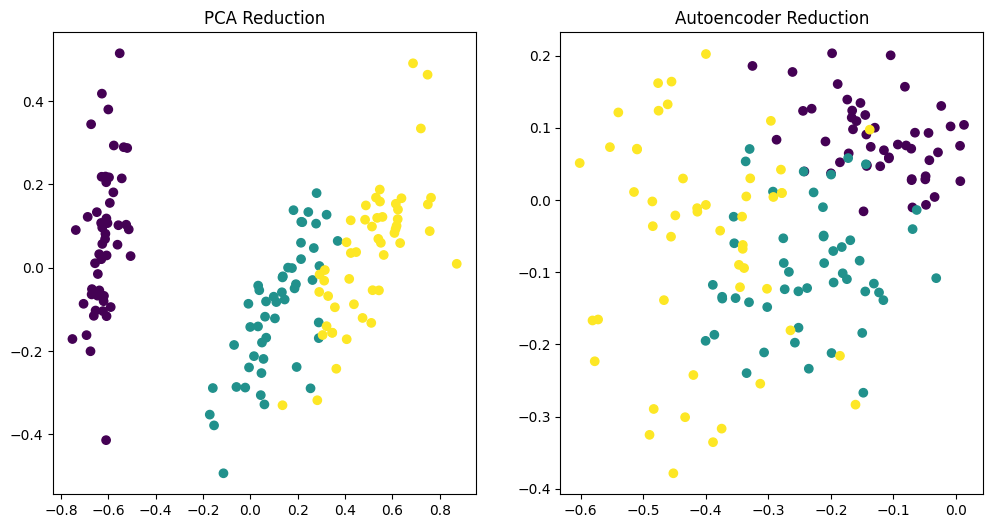

In [16]:
# Comparando gráficamente
plt.figure(figsize=(12,6))

# X_pca
plt.subplot(1,2,1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("PCA Reduction")

# X_autoencoded
plt.subplot(1,2,2)
plt.scatter(X_autoencoder[:, 0], X_autoencoder[:, 1], c=y)
plt.title("Autoencoder Reduction")

Getting decoder

In [17]:
# Tomas las capas que te interesan y las pones en un nuevo modelo (cool)
decoder = Sequential(autoencoder.layers[1:])

decoder

<Sequential name=sequential_2, built=False>

In [18]:
X_decoder = decoder.predict(X_autoencoder)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [20]:
X_decoder.shape, X_scaled.shape

((150, 4), (150, 4))

Text(0.5, 1.0, 'Decoded Reduction')

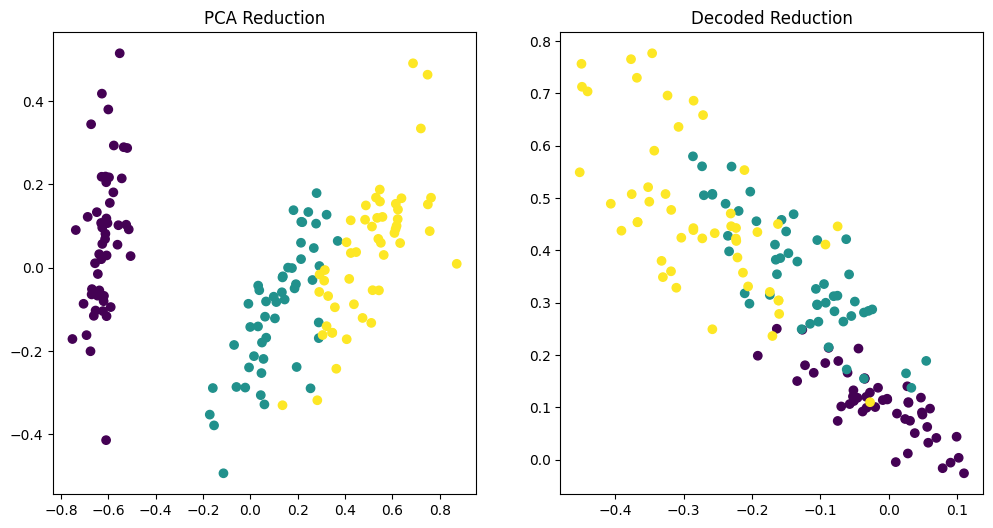

In [21]:
# Comparando gráficamente
plt.figure(figsize=(12,6))

# X_pca
plt.subplot(1,2,1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("PCA Reduction")

# X_autoencoded
plt.subplot(1,2,2)
plt.scatter(X_decoder[:, 0], X_decoder[:, 1], c=y)
plt.title("Decoded Reduction")